## 차원의 저주
- 차원이 커질수록 데이터 포인트들간 거리가 크데 늘어남
- 데이터가 희소화됨
- 수백 ~ 수천개 이상의 피처로 구성된 포인트들간 거리에 기반한 ML 알고리즘이 무력화됨
- 또한 피쳐가 많을 경우 개별 피쳐간에 상관관계가 높아 선형회귀와 같은 모델에서는 다중 공선성 문제로 모델의 예측 성능이 저하될 가능성이 높음

### 차원 축소의 장점
- 학습 데이터 크기를 줄여서 학습 시간 절약
- 불필요한 피처들을 줄여서 모델 성능 향상에 기여(주로 이미지 관련 데이터)
- 다차원의 데이터를 3차원 이하의 차원 축소를 통해서 시각적으로 보다 쉽게 데이터 패턴 인지

### 피처 선택과 피처 추출
1. 피처 선택 : 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것
2. 피처 추출 : 피처 추출은 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것. 새롭게 추출된 중요 특성은 기존의 피처를 반영해 압축된 것이지만 새로운 피처로 추출하는 것

### 차원 축소의 의미
- 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아니라 차원 축소를 통해 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데에 있음
    - 추천 엔진
    - 이미지 분류 및 변환
    - 문서 토픽 모델링

### PCA의 이해
- PCA(주성분 분석, Principal Component Analysis)
    - 고차원의 원본 데이터를 저차원의 부분 공간으로 투영하여 데이터를 축소하는 기법
    - 예를 들어 10차원의 데이터를 2차원의 부분 공간으로 투영하여 데이터를 축소
    - PCA는 원본 데이터가 가지는 데이터 변동성을 가장 중요한 정보로 간주하며 이 변동성에 기반한 원본 데이터 투영으로 차원 축소를 수행

### PCA 프로세스
- PCA를 선형대수 관점에서 해석해보면, 입력 데이터의 공분산 행렬을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환 하는 것
- 원본 데이터의 공분산 행렬 추출 -> 공분산 행렬을 고유벡터와 고유값 분해 -> 원본 데이터를 고유 벡터로 선형 변환 -> PCA 변환 값 도출
- 고유벡터는 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
- 고윳값은 바로 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타냄 

### 공분산 행렬
- 공분산은 두 변수 간의 변동을 의미
- 사람 키 X, 몸무게 Y -> 공분산은 X(키)가 증가할 때 Y(몸무게)도 증가한다는 의미
- 공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬이며 대칭 행렬임

### 선형 변환과 고유벡터/고윳값
- 선형 변환은 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것
- 고유벡터는 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭
- 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어서 향렬을 분해하는 데 사용됨

### PCA 요약
- PCA 변환 : 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식
- PCA 변환 수행 절차
    1. 입력 데이터 세트의 공분산 행렬을 생성
    2. 공분산 행렬의 고유벡터와 고유값을 계산
    3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출
    4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

### 사이킷런 PCA 클래스
- n_components는 PCA 축의 개수 즉 변환 차원을 의미
- PCA 전에 각 피처들의 값을 동일한 스케일로 변환하는 것이 필요 - 일반적으로 평균이 0, 분산이 1인 표준 정규 분포로 변환

## 실습 : 붓꽃 데이터 PCA

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target

print(irisDF.shape)
irisDF.head(3)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 데이터 시각화 확인

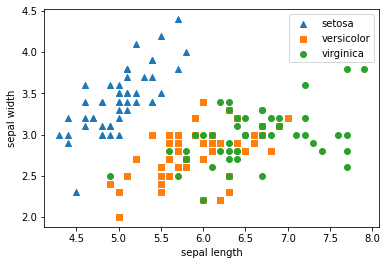

In [2]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o'] # 네모, 세모, 동그라미

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### PCA 수행(n_components = 2)

In [3]:
# 정규화(평균 0, 분산 1)
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [4]:
# PCA 수행(n_components = 2)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# fit()과 transform()을 호출하여 PCA 변환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# 차원이 2차원으로 변환된 것 확인
print(iris_pca.shape)

(150, 2)


In [5]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']

irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


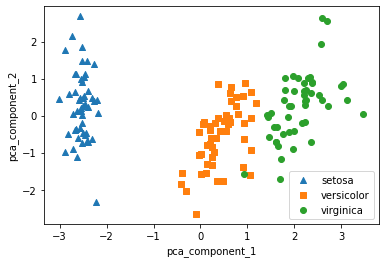

In [6]:
# PCA 차원 축소된 피처들로 데이터 산포도 시각화

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o'] # 네모, 세모, 동그라미

# pca_component_1을 x축, pc_component_2를 y축으로 scatter plot 수행.
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- PCA 이전에 비해 데이터들이 명확히 클러스터링된 것을 확인할 수 있다.

In [7]:
# 각 PCA Component별 변동성 비율
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


- 전체 변동성의 76%가 Component 1으로 설명될 수 있다

### 원본 데이터 vs PCA 데이터 간 예측성능 비교

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state = 156)

# 원본 데이터
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv = 3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [10]:
# PCA로 차원축소한 데이터
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring = 'accuracy', cv = 3)
print(scores_pca)
print(np.mean(scores_pca))

[0.98 0.98 1.  ]
0.9866666666666667


=> PCA 수행 후 예측 성능 증가

- 하지만 PCA 변환된 데이터가 원본 데이터보다 항상 더 나은 예측 정확도를 보이는 것은 아님
- PCA 변환 차원 갯수에 따라 예측 성능이 떨어지기도 함
- 4개의 속성이 2개의 속성이 되어도 예측 성능에 영향을 받지 않을 정도로 PCA 변환이 잘 되었음을 의미
- 고차원 데이터를 저차원으로 변환하면 직관적으로 이해하기 편하며, 데이터의 주축을 이루는 속서잉 무엇인지 파악할 수 있음

## 실습 : 신용카드 연체 예측 데이터 PCA

In [11]:
import pandas as pd
df = pd.read_excel('../datasets/default of credit card clients (1).xls', header = 1, sheet_name = 'Data').iloc[0:, 1:]

print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


### 데이터 전처리 : 컬럼명 변경, 속성/클래스 분류

In [12]:
# 컬럼명 변경
df.rename(columns = {'PAY_0' : 'PAY_1', 'default payment next month' : 'default'}, inplace = True)

# 속성과 클래스로 데이터 분류
y_target = df['default']
X_features = df.drop('default', axis = 1)

y_target.value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

In [13]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

### 피처 간 상관관계 살펴보기

<AxesSubplot:>

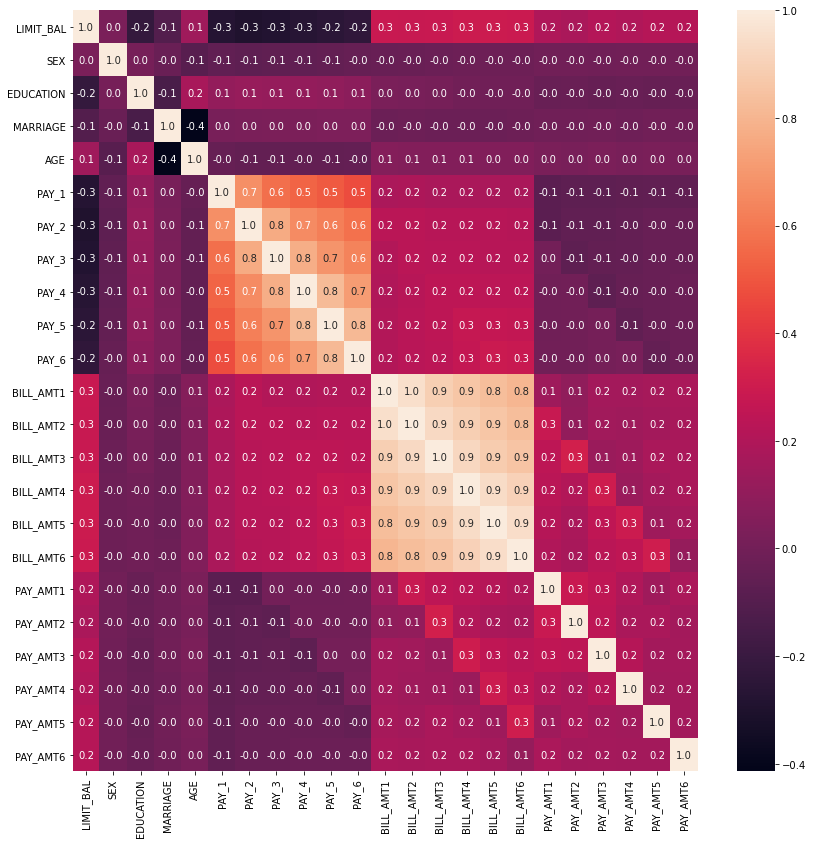

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize = (14, 14))
sns.heatmap(corr, annot = True, fmt='.1f')

### 일부 피처들 PCA 변환(n_components = 2)

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
print('대상 속성명 :', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성 :', pca.explained_variance_ratio_)

대상 속성명 : ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성 : [0.90555253 0.0509867 ]


- 6개의 피처를 2개의 피처로 PCA 변환했을 때 첫 번째 컴포넌트가 전체 변동성의 90%를 설명

### 전체 피처들 PCA 변환(n_components = 6)

In [18]:
# 1. 원본 데이터
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators = 300, random_state = 156)

# 원본 데이터일 때 랜덤 포레스트 예측 성능
scores = cross_val_score(rcf, X_features, y_target, scoring = 'accuracy', cv = 3)

print('CV = 3인 경우의 개별 Fold 세트별 정확도 : ', scores)
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

CV = 3인 경우의 개별 Fold 세트별 정확도 :  [0.8083 0.8196 0.8232]
평균 정확도 : 0.8170


In [19]:
# 2. PCA 변환된 데이터
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# PCA 변환을 수행하고 랜덤 포레스트 예측 성능
pca = PCA(n_components = 7)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring = 'accuracy', cv = 3)

print('CV = 3인 경우의 PCA 변환된 개별 Fold 세트별 정확도 : ', scores_pca)
print('PCA 변환 데이터셋 평균 정확도 : {0:.4f}'.format(np.mean(scores_pca)))

CV = 3인 경우의 PCA 변환된 개별 Fold 세트별 정확도 :  [0.794  0.799  0.8023]
PCA 변환 데이터셋 평균 정확도 : 0.7984


---

## LDA(Linear Discriminant Analysis)
- 선형 판별 분석법
- PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함.
- PCA는 입력 데이터 변동성의 가장 큰 축을 찾지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
- LDA는 같은 클래스의 데이터는 최대한 근접, 다른 클래스의 데이터는 최대한 떨어뜨리는 축 매핑
- 특정 공간 상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소
- 클래스 간 분산은 최대한 크게, 클래스 내부의 분산은 최대한 작게

### LDA 절차
- PCA와의 차이점은 공분산 행렬이 아니라 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터 구하고 입력 데이터를 투영한다는 점
1. 클래스 내부와 클래스 간 분산 행렬 구하기(두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구함)
2. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출
3. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

### 실습 LDA

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [21]:
lda = LinearDiscriminantAnalysis(n_components = 2)
# fit 호출시 target값 입력
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


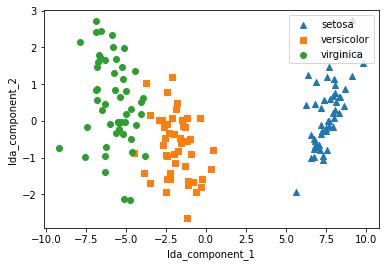

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2'] 

    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

---

## 특이값 분해 SVD
- 정방행렬 뿐만 아니라 행과 열의 크기가 다른 m * n 행렬도 분해 가능

### SVD 활용
- 이미지 압축/변환
- 추천 엔진
- 문서 잠재 의미 분석
- 의사 역행렬을 통한 모델 예측

In [23]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [24]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix : \n', np.round(U, 3))
print('Sigma Value : \n', np.round(Sigma, 3))
print('V transpose matrix : \n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix : 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value : 
 [3.423 2.023 0.463 0.079]
V transpose matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [25]:
# Sima를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


### 데이터 의존도가 높은 원본 데이터 행렬 생성 for compact SVD

In [26]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [27]:
# 다시 SVD를 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value : \n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value : 
 [2.663 0.807 0.    0.   ]


In [29]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


### Truncated SVD를 이용한 행렬 분해

In [30]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬 : \n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices = False)
print('\n분해 행렬 차원 :', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬 :', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\n Truncated SVD 분해 행렬 차원 :', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬 :', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬 : \n', matrix_tr)

원본 행렬 : 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원 : (6, 6) (6,) (6, 6)

Sigma값 행렬 : [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

 Truncated SVD 분해 행렬 차원 : (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬 : [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬 : 
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.

Text(0, 0.5, 'TruncatedSVD Component 2')

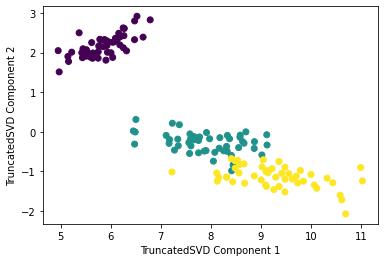

In [31]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환된 데이터 표현, 품종은 색깔로 구분
plt.scatter(x = iris_tsvd[:, 0], y = iris_tsvd[:, 1], c = iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

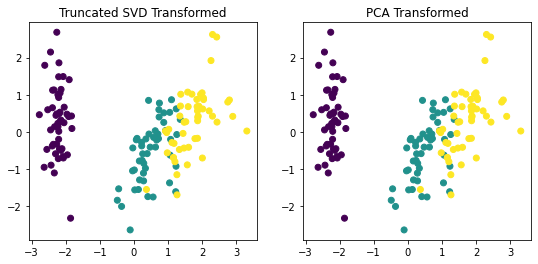

In [32]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize = (9, 4), ncols = 2)
ax1.scatter(x = iris_tsvd[:, 0], y = iris_tsvd[:, 1], c = iris.target)
ax2.scatter(x = iris_tsvd[:, 0], y = iris_tsvd[:, 1], c = iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

---

## NMF(Non Negative Matric Factorization)
- 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬로 분해할 수 있는 기법을 지칭

Text(0, 0.5, 'NMF Comppnent 2')

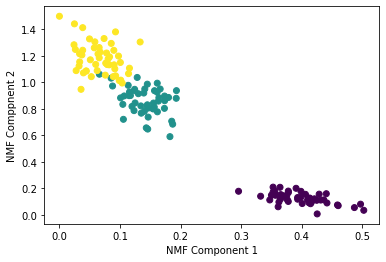

In [34]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components = 2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x = iris_nmf[:, 0], y = iris_nmf[:, 1], c = iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Comppnent 2')